# KNN From Scratch

## Step - 1 importing libraries and loading dataset

In [50]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
data = pd.read_csv('diamonds.csv')
data.head()
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [53]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Exploratory Data analysis

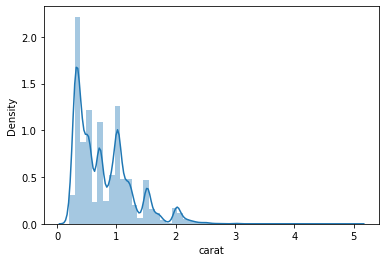

In [54]:
sns.distplot(data.carat);

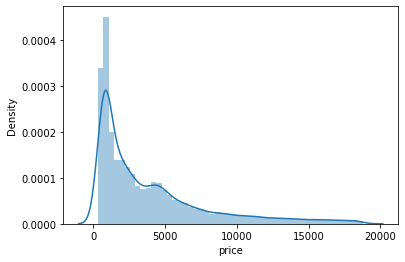

In [55]:
sns.distplot(data.price);

<AxesSubplot:xlabel='cut', ylabel='count'>

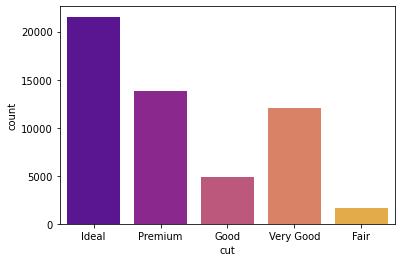

In [56]:
sns.countplot(data.cut,palette="plasma")

<AxesSubplot:xlabel='clarity', ylabel='count'>

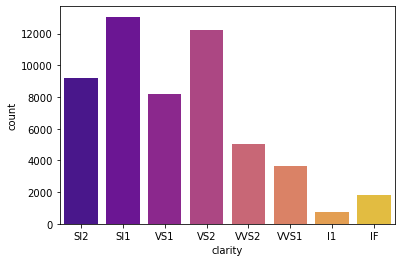

In [57]:
sns.countplot(data.clarity,palette="plasma")

<AxesSubplot:xlabel='color', ylabel='count'>

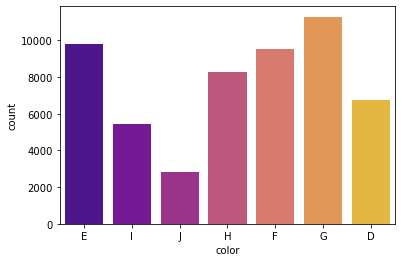

In [58]:
sns.countplot(data.color,palette="plasma")

In [59]:
data_1 = pd.get_dummies(data,columns=data.columns)
data_1.head()

,carat_0.2,carat_0.21,carat_0.22,carat_0.23,carat_0.24,carat_0.25,carat_0.26,carat_0.27,carat_0.28,carat_0.29,...,z_6.17,z_6.24,z_6.27,z_6.31,z_6.38,z_6.43,z_6.72,z_6.98,z_8.06,z_31.8
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

In [61]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [62]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KNN Scratch

In [64]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        result=[]
        for x in X:
            dis=np.sqrt(np.sum((x-self.X)**2,axis=1))
            index=dis.argsort()
            index=index[:self.k]
            result.append(np.mean(self.y[index]))
        return np.array(result)

In [ ]:
knn=KNN(k=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
u1=mean_squared_error(y_test,y_pred)

In [ ]:
from sklearn.metrics import r2_score
u2=r2_score(y_test,y_pred)

### Sk-Learn KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
sk_preds = knn.predict(X_test)
l1=mean_squared_error(y_test,sk_preds)
l2=r2_score(y_test,sk_preds)
print(l1)
print(l2)

In [ ]:
i = [u1,l1]
j = [u2,l2]
sns.countplot(i,palette="plasma")


In [ ]:
sns.countplot(j,palette="plasma")

### We can clearly see here there is no difference both graph are nearly identical so we can say that our KNN from scratch is as efficient as Sklearn's